**Applying deep learning models on the digit recognizer dataset**

In this project, I apply various deep learning models on the famous __[MNIST digit recognizer dataset](https://www.kaggle.com/c/digit-recognizer)__.

In [1]:
# Import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

import keras
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten 
from keras.optimizers import RMSprop, Adam, SGD
from keras import metrics

Using TensorFlow backend.
/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
# Import data
train = pd.read_csv('~/Desktop/Kaggle/data/digits/train.csv')
test = pd.read_csv('~/Desktop/Kaggle/data/digits/test.csv')

y_train = train['label']
X_train = train.loc[:, train.columns != 'label']

In [3]:
# Samples info
print('Number of train samples: ',X_train.shape[0])
print('Number of classes: ', len(np.unique(y_train)))

Number of train samples:  42000
Number of classes:  10


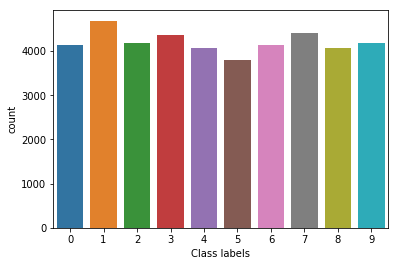

In [4]:
# Plot class counts
sns.countplot(y_train)
plt.xlabel ('Class labels')
plt.show()

In [5]:
# Train-test split
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=321)

In [6]:
# Reshape
x_train = x_train.values.reshape(x_train.shape[0], 28, 28,1)
x_val = x_val.values.reshape(x_val.shape[0], 28, 28, 1)

In [7]:
# Scale 
x_train = x_train / 255
x_val = x_val / 255

# Save as float32
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')

# Sample shapes
print(x_train.shape[0], 'train digit images')
print(x_val.shape[0], 'validation digit images')

37800 train digit images
4200 validation digit images


In [8]:
# Convert y_train, y_val to categorical
y_train = to_categorical(y_train, num_classes = 10)
y_val = to_categorical(y_val, num_classes = 10)

In [9]:
# Build a model
model = Sequential()

# Add the first convolution layer
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28,28,1)))

# Add the first pooling layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Add the second convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add the second pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the matrix into vector
model.add(Flatten())

# Add a dense (or fully connected) layer
model.add(Dense(1000, activation='relu'))

# Add output layer
model.add(Dense(10, activation='softmax'))

In [10]:
# Summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1601000   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total para

In [11]:
# Define early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=10, verbose=0, mode='auto')
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.0001)

In [12]:
def fit_evaluate_cnn(BatchSize):
    model_history=model.fit(x_train,y_train, epochs=10, batch_size=BatchSize, validation_data=(x_val,y_val),
                            verbose=1, callbacks=[early_stopping, reduce_lr])
    #Plot accuracy
    sns.set(style="darkgrid")
    fig = plt.figure(figsize=(7,6))
    plt.plot(model_history.history['acc']) # Train accuracy
    plt.plot(model_history.history['val_acc']) # Validation accuracy
    plt.title('Model accuracy across epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.ylim(0.90,1 )
    plt.xlim(0, 10)
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()
    
    # Plot loss
    sns.set(style="darkgrid")
    fig = plt.figure(figsize=(7,6))
    plt.plot(model_history.history['loss']) # Train loss 
    plt.plot(model_history.history['val_loss']) # Validation loss
    plt.title('Model loss across epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.ylim(0.02, 0.3)
    plt.xlim(0, 10)
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

In [13]:
# Fit CNN with Adam optimizer and 100 batches
model.compile(keras.optimizers.Adam(lr=1e-5), loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 41s 1ms/step - loss: 0.2767 - acc: 0.9012 - val_loss: 0.2015 - val_acc: 0.9121
Epoch 2/10
37800/37800 [==============================] - 41s 1ms/step - loss: 0.1353 - acc: 0.9482 - val_loss: 0.0939 - val_acc: 0.9700
Epoch 3/10
37800/37800 [==============================] - 43s 1ms/step - loss: 0.0755 - acc: 0.9764 - val_loss: 0.0644 - val_acc: 0.9799
Epoch 4/10
37800/37800 [==============================] - 46s 1ms/step - loss: 0.0563 - acc: 0.9824 - val_loss: 0.0520 - val_acc: 0.9835
Epoch 5/10
37800/37800 [==============================] - 42s 1ms/step - loss: 0.0469 - acc: 0.9851 - val_loss: 0.0450 - val_acc: 0.9856
Epoch 6/10
37800/37800 [==============================] - 42s 1ms/step - loss: 0.0411 - acc: 0.9867 - val_loss: 0.0401 - val_acc: 0.9872
Epoch 7/10
37800/37800 [==============================] - 41s 1ms/step - loss: 0.0369 - acc: 0.9881 - val_loss: 0.0363 - val_acc:

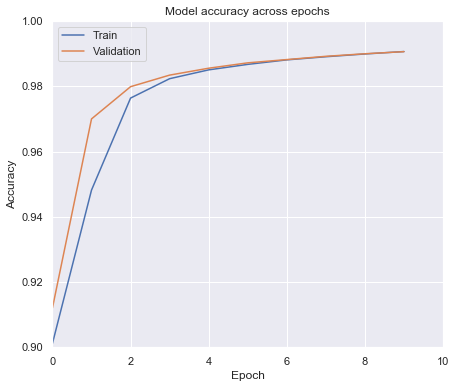

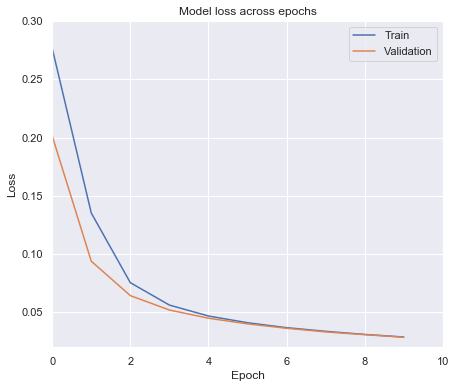

In [14]:
# Fit and evaluate model
fit_evaluate_cnn(100)